## Import the dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

## Get data and show some infos

In [7]:
revs=pd.read_csv(r'C:\Users\MUSTAPHA\Desktop\DS WorkSpace\MoviesReviewsAnlayzer\data\train.csv',sep='\t')

In [63]:
revs.head()

,PhraseId,SentenceId,Phrase,Sentiment,review length
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6


In [11]:
revs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.2+ MB


In [12]:
revs.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


## Visualizing data

In [13]:
revs['review length']=revs['Phrase'].apply(len)

In [14]:
revs.head()

,PhraseId,SentenceId,Phrase,Sentiment,review length
0,1,1,A series of escapades demonstrating the adage ...,1,188
1,2,1,A series of escapades demonstrating the adage ...,2,77
2,3,1,A series,2,8
3,4,1,A,2,1
4,5,1,series,2,6


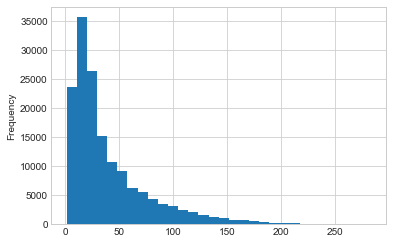

In [32]:
plt.style.use('seaborn-whitegrid')
#plt.hist(x=revs['review length'])
revs['review length'].plot(bins=30, kind='hist') 

In [34]:
#show some infos about length review comulmn
revs['review length'].describe()

count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: review length, dtype: float64

In [41]:
#get the longest review!
revs[revs['review length']==283]['Phrase'].iloc[0]

"... spiced with humor -LRB- ' I speak fluent flatula , ' advises Denlopp after a rather , er , bubbly exchange with an alien deckhand -RRB- and witty updatings -LRB- Silver 's parrot has been replaced with Morph , a cute alien creature who mimics everyone and everything around -RRB-"

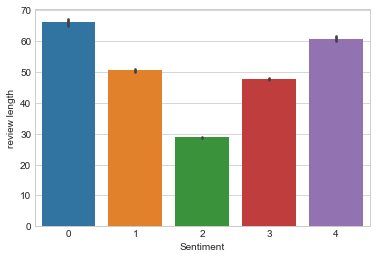

In [29]:
#let's visualize review length by Sentiment 
sb.barplot(y='review length',x='Sentiment',data=revs)

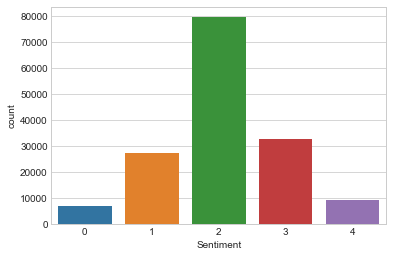

In [31]:
#let's count our reviews by each Sentiment label
sb.countplot(x='Sentiment',data=revs)

count    156060.000000
mean         40.217224
std          38.154130
min           1.000000
25%          14.000000
50%          26.000000
75%          53.000000
max         283.000000
Name: review length, dtype: float64

## Text preprocessing 

In [53]:
#define the text procesor
def text_tokenizer(text):
    
    tweet_blob = TextBlob(text)
    text_cleaned= ' '.join(tweet_blob.words)
    words=text_cleaned.split(' ')

    message=[]
    for word in words:
        if word.lower()  not in stopwords.words('English'):
            message.append(word)
     
    
    
    return message

## Train Test Split

In [54]:
X=revs['Phrase']
y=revs['Sentiment']
revs_train, revs_test, Sentiment_train, Sentiment_test =train_test_split(X, y,test_size=0.3)

## Build the model and fit, predict

In [55]:
# Build the pipline 
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_tokenizer)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [56]:
pipeline.fit(revs_train,Sentiment_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_tokenizer at 0x0E5E1930>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [57]:
predictions= pipeline.predict(revs_test)

## Let's evaluate

In [58]:
# Run some metrics 
print("Metrics Report \n :",classification_report(predictions,Sentiment_test))
print('\n')
print("Confusion Matrix :",confusion_matrix(predictions,Sentiment_test))
print('\n')
print("Accuracy Score :",accuracy_score(predictions,Sentiment_test))


Metrics Report 
 :              precision    recall  f1-score   support

          0       0.04      0.66      0.08       144
          1       0.27      0.50      0.35      4433
          2       0.88      0.61      0.72     34517
          3       0.40      0.53      0.46      7506
          4       0.05      0.61      0.09       218

avg / total       0.74      0.59      0.64     46818



Confusion Matrix : [[   95    40     7     2     0]
 [  921  2232  1135   133    12]
 [ 1093  5668 21047  5762   947]
 [   34   225  1603  3990  1654]
 [    0     2    15    68   133]]


Accuracy Score : 0.5873168439489085


## Testing

In [72]:
test=pd.read_csv(r'C:\Users\MUSTAPHA\Desktop\DS WorkSpace\MoviesReviewsAnlayzer\data\test.csv',sep='\t')
test.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66292 entries, 0 to 66291
Data columns (total 3 columns):
PhraseId      66292 non-null int64
SentenceId    66292 non-null int64
Phrase        66292 non-null object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [69]:
test_preds=pipeline.predict(test['Phrase'])

In [75]:
test_preds.shape

(66292,)

In [93]:
phraseId=test['PhraseId'].values
type(phraseId)

numpy.ndarray

In [106]:
testing=pd.DataFrame({"phraseId":phraseId,"rating":test_preds})

In [107]:
testing.head()

,phraseId,rating
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,3
